<a href="https://colab.research.google.com/github/onstriqui/Adaptive-Video-Bitrate-Allocation-4-RODV/blob/main/RODV_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

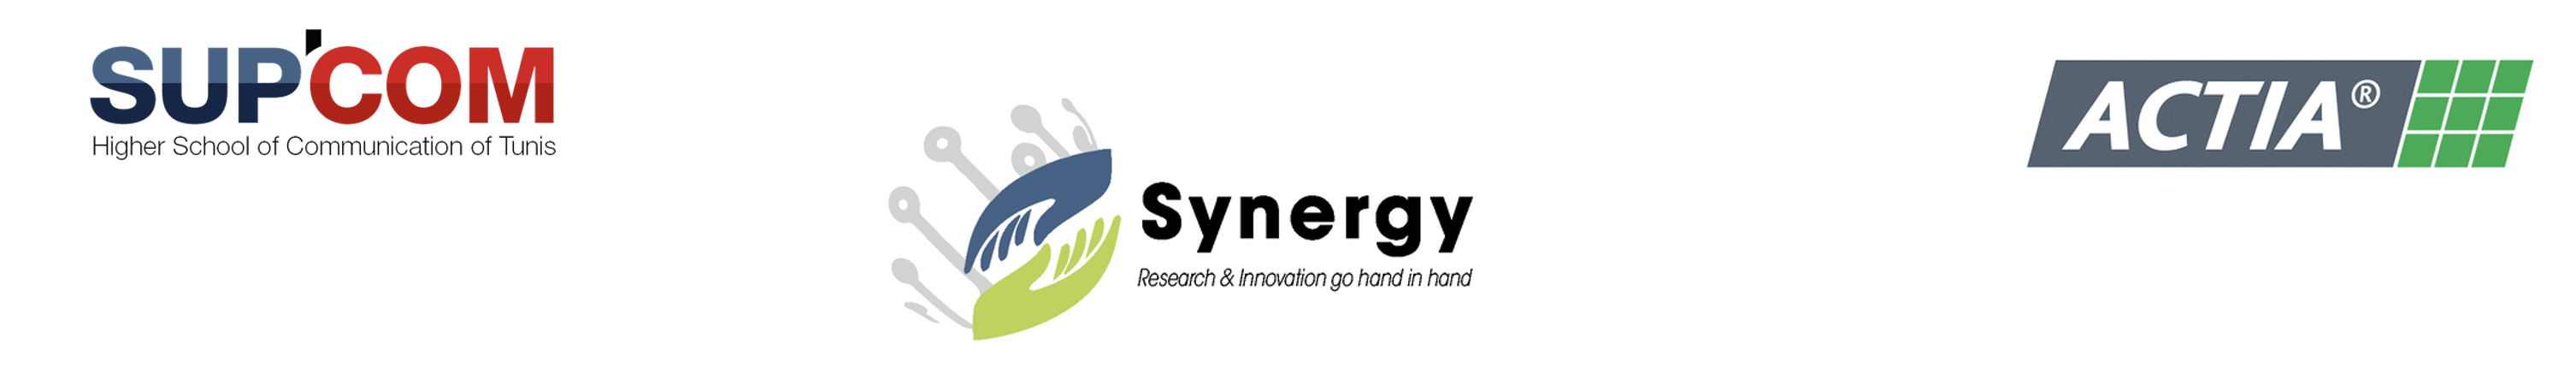
# ***Adaptive Video Bitrate Allocation for RODV***

**By Ons Triqui & Eman Sarah Afi**

*Done during the Actia Engineering Services' Summer 2024 internship program in collaboration with SUP'COM in Tunis, Tunisia.*

# **nuScenes Dataset Preparation:**

**Set up Google Drive to download and store the dataset:**

*Note: It is recommended that the Google Account has at least 2 TB of storage.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Create the necessary directories to download the datasets and extract them:**

*Note: "v1.0-test" was not created as it has been decided to use the training dataset's metadata instead, hence it will be extracted later and renamed for testing purposes. The reason for this decision will be explained later.*

In [ ]:
import os

trainval_dir = '/content/drive/MyDrive/nuscenes/trainval'
test_dir = '/content/drive/MyDrive/nuscenes/test'

os.makedirs(os.path.join(trainval_dir, 'samples'), exist_ok=True)
os.makedirs(os.path.join(trainval_dir, 'sweeps'), exist_ok=True)
os.makedirs(os.path.join(trainval_dir, 'maps'), exist_ok=True)
os.makedirs(os.path.join(trainval_dir, 'v1.0-trainval'), exist_ok=True)

os.makedirs(os.path.join(test_dir, 'samples'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'sweeps'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'maps'), exist_ok=True)

**Download the training datasets and metadata:**

*Note: For consistency and resource management purposes, it was agreed that the first 2 training subdatasets of nuScenes will serve for training purposes, whereas the third one will be set as the testing dataset. The metadata will be used for both training and testing datasets.*

In [ ]:
!wget -c https://d36yt3mvayqw5m.cloudfront.net/public/v1.0/v1.0-trainval_meta.tgz -P /content/drive/MyDrive/nuscenes/trainval/

--2024-08-23 19:10:01--  https://d36yt3mvayqw5m.cloudfront.net/public/v1.0/v1.0-trainval_meta.tgz
Resolving d36yt3mvayqw5m.cloudfront.net (d36yt3mvayqw5m.cloudfront.net)... 13.35.37.228, 13.35.37.14, 13.35.37.96, ...
Connecting to d36yt3mvayqw5m.cloudfront.net (d36yt3mvayqw5m.cloudfront.net)|13.35.37.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461678030 (440M) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval_meta.tgz’

v1.0-trainval_meta. 100%[===================>] 440.29M  19.8MB/s    in 24s     

2024-08-23 19:10:26 (18.6 MB/s) - ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval_meta.tgz’ saved [461678030/461678030]



In [ ]:
!wget -c https://motional-nuscenes.s3.amazonaws.com/public/v1.0/v1.0-trainval01_blobs.tgz -P /content/drive/MyDrive/nuscenes/trainval/

--2024-08-19 15:17:01--  https://motional-nuscenes.s3.amazonaws.com/public/v1.0/v1.0-trainval01_blobs.tgz
Resolving motional-nuscenes.s3.amazonaws.com (motional-nuscenes.s3.amazonaws.com)... 52.219.199.53, 52.219.136.61, 52.219.199.49, ...
Connecting to motional-nuscenes.s3.amazonaws.com (motional-nuscenes.s3.amazonaws.com)|52.219.199.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31579122687 (29G) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval01_blobs.tgz’

v1.0-trainval01_blo 100%[===================>]  29.41G  18.0MB/s    in 28m 55s 

2024-08-19 15:45:57 (17.4 MB/s) - ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval01_blobs.tgz’ saved [31579122687/31579122687]



In [ ]:
!wget -c https://motional-nuscenes.s3.amazonaws.com/public/v1.0/v1.0-trainval02_blobs.tgz -P /content/drive/MyDrive/nuscenes/trainval/

--2024-08-20 13:23:23--  https://motional-nuscenes.s3.amazonaws.com/public/v1.0/v1.0-trainval02_blobs.tgz
Resolving motional-nuscenes.s3.amazonaws.com (motional-nuscenes.s3.amazonaws.com)... 52.219.1.81, 52.219.162.37, 52.219.162.133, ...
Connecting to motional-nuscenes.s3.amazonaws.com (motional-nuscenes.s3.amazonaws.com)|52.219.1.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30134721083 (28G) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval02_blobs.tgz’

v1.0-trainval02_blo 100%[===================>]  28.06G  21.4MB/s    in 26m 1s  

2024-08-20 13:49:26 (18.4 MB/s) - ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval02_blobs.tgz’ saved [30134721083/30134721083]



In [ ]:
!wget -c https://motional-nuscenes.s3.amazonaws.com/public/v1.0/v1.0-trainval03_blobs.tgz -P /content/drive/MyDrive/nuscenes/trainval/

--2024-08-21 13:40:41--  https://motional-nuscenes.s3.amazonaws.com/public/v1.0/v1.0-trainval03_blobs.tgz
Resolving motional-nuscenes.s3.amazonaws.com (motional-nuscenes.s3.amazonaws.com)... 52.219.163.17, 52.219.152.33, 52.219.198.37, ...
Connecting to motional-nuscenes.s3.amazonaws.com (motional-nuscenes.s3.amazonaws.com)|52.219.163.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29872679856 (28G) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval03_blobs.tgz’

v1.0-trainval03_blo 100%[===================>]  27.82G  27.0MB/s    in 18m 16s 

2024-08-21 13:58:57 (26.0 MB/s) - ‘/content/drive/MyDrive/nuscenes/trainval/v1.0-trainval03_blobs.tgz’ saved [29872679856/29872679856]



**Extract the first 2 training subdatasets to be one training dataset:**

In [ ]:
!tar -xvzf /content/drive/MyDrive/nuscenes/trainval/v1.0-trainval01_blobs.tgz -C /content/drive/MyDrive/nuscenes/trainval/

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
sweeps/RADAR_FRONT/n015-2018-07-24-11-13-19+0800__RADAR_FRONT__1532402482267313.pcd
sweeps/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402584811235.pcd
sweeps/RADAR_FRONT/n015-2018-07-18-11-18-34+0800__RADAR_FRONT__1531884171656929.pcd
sweeps/RADAR_FRONT/n015-2018-07-24-11-13-19+0800__RADAR_FRONT__1532402486578721.pcd
sweeps/RADAR_FRONT/n015-2018-07-18-11-50-34+0800__RADAR_FRONT__1531886209557577.pcd
sweeps/RADAR_FRONT/n008-2018-08-01-15-52-19-0400__RADAR_FRONT__1533153449162412.pcd
sweeps/RADAR_FRONT/n008-2018-08-01-15-16-36-0400__RADAR_FRONT__1533151211230317.pcd
sweeps/RADAR_FRONT/n008-2018-08-01-15-52-19-0400__RADAR_FRONT__1533153434333120.pcd
sweeps/RADAR_FRONT/n015-2018-07-24-11-13-19+0800__RADAR_FRONT__1532402145325085.pcd
sweeps/RADAR_FRONT/n015-2018-07-18-11-50-34+0800__RADAR_FRONT__1531886135838474.pcd
sweeps/RADAR_FRONT/n015-2018-07-18-11-18-34+0800__RADAR_FRONT__1531884407889908.pc

In [ ]:
!tar -xvzf /content/drive/MyDrive/nuscenes/trainval/v1.0-trainval02_blobs.tgz -C /content/drive/MyDrive/nuscenes/trainval/

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
sweeps/RADAR_FRONT/n008-2018-07-26-12-13-50-0400__RADAR_FRONT__1532622008723454.pcd
sweeps/RADAR_FRONT/n008-2018-05-21-11-06-59-0400__RADAR_FRONT__1526915382286564.pcd
sweeps/RADAR_FRONT/n008-2018-08-01-15-16-36-0400__RADAR_FRONT__1533151734781989.pcd
sweeps/RADAR_FRONT/n015-2018-08-01-16-32-59+0800__RADAR_FRONT__1533112728952767.pcd
sweeps/RADAR_FRONT/n015-2018-07-27-11-36-48+0800__RADAR_FRONT__1532663149263619.pcd
sweeps/RADAR_FRONT/n015-2018-08-01-16-41-59+0800__RADAR_FRONT__1533112943673498.pcd
sweeps/RADAR_FRONT/n015-2018-07-27-11-36-48+0800__RADAR_FRONT__1532662860383776.pcd
sweeps/RADAR_FRONT/n008-2018-07-26-12-13-50-0400__RADAR_FRONT__1532621762555570.pcd
sweeps/RADAR_FRONT/n008-2018-05-21-11-06-59-0400__RADAR_FRONT__1526915695255410.pcd
sweeps/RADAR_FRONT/n015-2018-08-01-16-32-59+0800__RADAR_FRONT__1533112742812402.pcd
sweeps/RADAR_FRONT/n008-2018-05-21-11-06-59-0400__RADAR_FRONT__1526915621077018.pc

**Extract the third training subdataset to be a testing dataset:**

In [ ]:
!tar -xvzf /content/drive/MyDrive/nuscenes/trainval/v1.0-trainval03_blobs.tgz -C /content/drive/MyDrive/nuscenes/test/

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
sweeps/RADAR_FRONT/n015-2018-07-11-11-54-16+0800__RADAR_FRONT__1531281913478489.pcd
sweeps/RADAR_FRONT/n008-2018-07-27-12-07-38-0400__RADAR_FRONT__1532708430667771.pcd
sweeps/RADAR_FRONT/n015-2018-07-11-11-54-16+0800__RADAR_FRONT__1531281506030274.pcd
sweeps/RADAR_FRONT/n015-2018-07-11-11-54-16+0800__RADAR_FRONT__1531281847587007.pcd
sweeps/RADAR_FRONT/n015-2018-07-27-11-24-31+0800__RADAR_FRONT__1532662094220576.pcd
sweeps/RADAR_FRONT/n015-2018-07-11-11-54-16+0800__RADAR_FRONT__1531281492965737.pcd
sweeps/RADAR_FRONT/n008-2018-08-31-11-19-57-0400__RADAR_FRONT__1535729252062996.pcd
sweeps/RADAR_FRONT/n008-2018-07-27-12-07-38-0400__RADAR_FRONT__1532707969229646.pcd
sweeps/RADAR_FRONT/n015-2018-07-16-11-49-16+0800__RADAR_FRONT__1531713371147238.pcd
sweeps/RADAR_FRONT/n008-2018-08-21-11-53-44-0400__RADAR_FRONT__1534867049694159.pcd
sweeps/RADAR_FRONT/n008-2018-08-28-16-16-48-0400__RADAR_FRONT__1535487901422888.pc

**Extract the metadata for both training and testing datasets:**

*Note: The metadata for the training dataset has also been extracted and renamed for testing purposes as previously explained.*

In [ ]:
!tar -xvzf /content/drive/MyDrive/nuscenes/trainval/v1.0-trainval_meta.tgz -C /content/drive/MyDrive/nuscenes/trainval/

!tar -xvzf /content/drive/MyDrive/nuscenes/trainval/v1.0-trainval_meta.tgz -C /content/drive/MyDrive/nuscenes/test/ \
&& mv /content/drive/MyDrive/nuscenes/test/v1.0-trainval /content/drive/MyDrive/nuscenes/test/v1.0-test

maps/
maps/93406b464a165eaba6d9de76ca09f5da.png
maps/53992ee3023e5494b90c316c183be829.png
maps/37819e65e09e5547b8a3ceaefba56bb2.png
maps/36092f0b03a857c6a3403e25b4b7aab3.png
v1.0-trainval/
v1.0-trainval/ego_pose.json
v1.0-trainval/instance.json
v1.0-trainval/category.json
v1.0-trainval/attribute.json
v1.0-trainval/calibrated_sensor.json
v1.0-trainval/scene.json
v1.0-trainval/log.json
v1.0-trainval/map.json
v1.0-trainval/sample_data.json
v1.0-trainval/sample_annotation.json
v1.0-trainval/sensor.json
v1.0-trainval/sample.json
v1.0-trainval/visibility.json
.v1.0-trainval_meta.txt
LICENSE
maps/
maps/93406b464a165eaba6d9de76ca09f5da.png
maps/53992ee3023e5494b90c316c183be829.png
maps/37819e65e09e5547b8a3ceaefba56bb2.png
maps/36092f0b03a857c6a3403e25b4b7aab3.png
v1.0-trainval/
v1.0-trainval/ego_pose.json
v1.0-trainval/instance.json
v1.0-trainval/category.json
v1.0-trainval/attribute.json
v1.0-trainval/calibrated_sensor.json
v1.0-trainval/scene.json
v1.0-trainval/log.json
v1.0-trainval/map.jso

# **3D Object Detection:**

**It is recommended to install Python 3.8 to use mmdetection3d:**

In [1]:
!apt-get update -y

!apt-get install python3.8 python3.8-distutils

!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1

!update-alternatives --config python3

!apt-get install python3-pip
!python3 -m pip install --upgrade pip --user

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [962 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,264 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease

In [2]:
!pip install torch torchvision

  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.13.2-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 161.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 167.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Install MMEngine, MMCV and MMDetection using MIM & PIP when necessary:**

In [3]:
!pip3 install openmim
!mim install mmengine
!pip install "mmcv>=2.0.0rc4,<2.1.0" -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.12.0/index.html
!mim install "mmdet>=3.0.0,<3.1.0"

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.8.0-py3-none-any.whl.metadata (18 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached importlib_metadata-8.4.0-py3-none-any.whl.metadata (4.7 kB)
  Preparing metadata (setup.py) ... done
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached zipp-3.20.1-py3-none-any.whl.metadata (3.7 kB)
  Preparing metadata (setup.py) ... done
  Preparing me

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached platformdirs-4.2.2-py3-none-any.whl.metadata (11 kB)
  Using cached tomli-2.0.1-py3-none-any.whl.metadata (8.9 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 127.4 MB/s eta 0:00:00
Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 124.5 MB/s eta 0:00:00
Using cached importlib_resourc

**Install MMDetection3D from source:**

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection3d.git -b dev-1.x
%cd mmdetection3d
!pip install -e .

fatal: destination path 'mmdetection3d' already exists and is not an empty directory.
/content/mmdetection3d
Obtaining file:///content/mmdetection3d
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmdet3d
    Found existing installation: mmdet3d 1.4.0
    Uninstalling mmdet3d-1.4.0:
      Successfully uninstalled mmdet3d-1.4.0
  Running setup.py develop for mmdet3d


**Verify if Torch & MMCV work properly:**

In [ ]:
!python -c 'import torch; print(torch.cuda.is_available())'

!python -c 'import mmcv; import mmcv.ops'

True


**Verify that mmdet3d works:**

In [ ]:
import mmdet3d
print(mmdet3d.__version__)
# Example output: 1.1.0, or an another version.

1.4.0


In [ ]:
!apt install nvidia-cuda-toolkit --yes

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
nvidia-cuda-toolkit is already the newest version (11.5.1-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!ln -s /content/drive/MyDrive/nuscenes ./data/nuscenes

In [ ]:
NUSCENES_TRAINVAL_DATASET_ROOT = '/content/drive/MyDrive/nuscenes/trainval'
NUSCENES_TEST_DATASET_ROOT = '/content/drive/MyDrive/nuscenes/test'

In [ ]:
!python tools/train.py configs/pointpillars/pointpillars_hv_secfpn_sbn-all_16xb2-2x_waymoD5-3d-3class.py

In [ ]:
!python tools/test.py configs/pointpillars/pointpillars_hv_secfpn_sbn-all_16xb2-2x_waymoD5-3d-3class.py

# **VCA:**

**Building Phase:**

In [ ]:
!cmake --version


cmake version 3.30.2

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [ ]:
!g++ --version


g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!apt-get install -y nasm


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  nasm
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 375 kB of archives.
After this operation, 3,345 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 nasm amd64 2.15.05-1 [375 kB]
Fetched 375 kB in 1s (710 kB/s)
Selecting previously unselected package nasm.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../nasm_2.15.05-1_amd64.deb ...
Unpacking nasm (2.15.05-1) ...
Setting up nasm (2.15.05-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!nasm -v


NASM version 2.15.05


**Execute Build:**

In [ ]:
!git clone https://github.com/cd-athena/VCA.git
%cd VCA
!mkdir build
%cd build
!cmake ../
!cmake --build .

Cloning into 'VCA'...
remote: Enumerating objects: 2139, done.
remote: Counting objects: 100% (2139/2139), done.
remote: Compressing objects: 100% (862/862), done.
remote: Total 2139 (delta 1243), reused 2020 (delta 1222), pack-reused 0 (from 0)
Receiving objects: 100% (2139/2139), 854.22 KiB | 2.53 MiB/s, done.
Resolving deltas: 100% (1243/1243), done.
/content/VCA
/content/VCA/build
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- VCA version v2.0+6-g1283f1f
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIB

# **QADRA:**

**Set up the environment:**

In [ ]:
# Clone the repository
!git clone https://github.com/PhoenixVideo/QADRA.git

# Change directory to the cloned repository
%cd QADRA

# Install required packages directly
!pip install -r requirements.txt

Cloning into 'QADRA'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 127 (delta 4), reused 4 (delta 1), pack-reused 112 (from 1)
Receiving objects: 100% (127/127), 270.84 MiB | 31.06 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/QADRA/QADRA


**Run the Application with the required CLI option and corresponding values:**

In [ ]:
!python main.py --maxEncTime 100 --maxDecTime 200 --codec vvenc --resultCsv output.csv --rmax 1080 --maxQuality 90 --jnd 5

In [ ]:
!tar -xvzf /content/3D-Detection.tgz -C /content/drive/MyDrive/nuscenes/trainval/